# National Data Comparisons

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy.stats import linregress
from pingouin import ancova

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the CSVs
nyc_file = "../New York/violent_crime_df_ny.csv"
la_file = "../Los Angeles/LA_Violent_Crime.csv"
tampa_file = "../Tampa/Tampa_violent_crime.csv"
chicago_file = "../Chicago/Chicago_Violent_Crime.csv"
dc_file = "../DC_Crime/DC_Violent_Crime.csv"
US_file = "National Data/FBI_US_Crime_Averages.csv"

#Reading CSVs
nyc_data = pd.read_csv(nyc_file)
la_data = pd.read_csv(la_file)
tampa_data = pd.read_csv(tampa_file)
chicago_data = pd.read_csv(chicago_file)
dc_data = pd.read_csv(dc_file)

US_data = pd.read_csv(US_file)

## Crime Rates

In [3]:
#Clean up FBI US Data
US_data = US_data.rename(columns = {'Violent \ncrime \nrate ': 'value_US', 'Year': 'year'})
US_data = US_data[['year', 'value_US']]

In [4]:
#Merge the dataframes using only the appropriate years
national_data = pd.merge(nyc_data, la_data, on='year', how='outer', suffixes=('_NYC', '_LA'))

national_data = pd.merge(national_data, chicago_data, on='year', how='outer')
national_data = national_data.rename(columns = {'value': 'value_Chi'})

national_data = pd.merge(national_data, tampa_data, on='year', how='outer')
national_data = national_data.rename(columns = {'value': 'value_Tamp'})

dc_data = dc_data.rename(columns={'Year': 'year'})
national_data = pd.merge(national_data, dc_data, on='year', how='outer')
national_data = national_data.rename(columns = {'Violent Crime Rate': 'value_DC'})

national_data = national_data[['year', 'value_NYC', 'value_LA', 'value_Chi', 'value_Tamp', 'value_DC']]

national_data = national_data.rename(columns = {'value_NYC': 'New York City', 'value_LA': 'Los Angeles', 'value_Chi': 'Chicago', 
                                                'value_Tamp': 'Tampa', 'value_DC': 'Washington D.C.'})


national_data = pd.merge(national_data, US_data, on='year', how='left')
national_data = national_data.rename(columns = {'value_US': 'U.S. Average'})

#Drop Redundant Rows
national_data = national_data.drop(index=[9,13,14,15])

#List by City
LA_crime = national_data['Los Angeles']
NYC_crime = national_data['New York City']
Chi_crime = national_data['Chicago']
Tamp_crime = national_data['Tampa']
DC_crime = national_data['Washington D.C.']
US_crime = national_data['U.S. Average']

#Export to CSV
national_data.to_csv('Comparative_Crime_Data.csv')

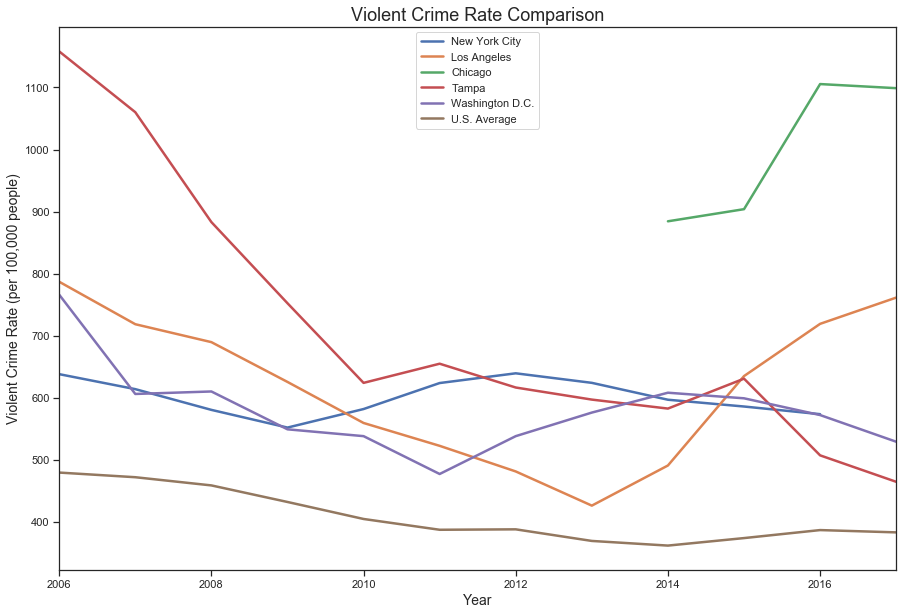

In [5]:
#Line Graph
national_data.plot(kind='line', x = 'year', figsize = (15,10), lw=2.5)
plt.xlabel('Year', size=14)
plt.ylabel('Violent Crime Rate (per 100,000 people)', size=14)
plt.title('Violent Crime Rate Comparison', size=18)
plt.savefig('Graphs/Violent Crime Rate Comparison (Line)')

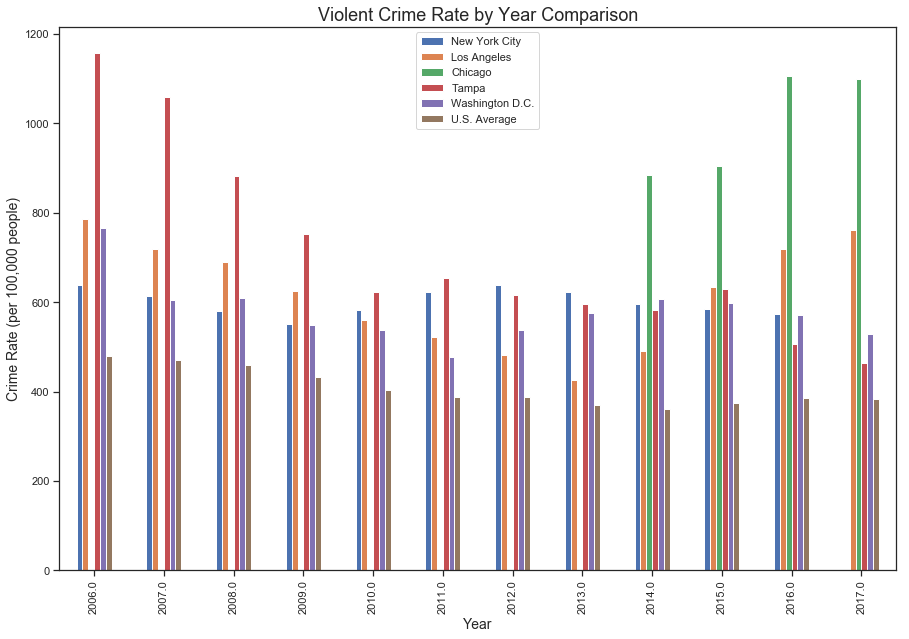

In [6]:
#Bar Graph
national_data.plot(kind='bar', x='year', figsize=(15,10))
plt.xlabel('Year', size=14)
plt.ylabel('Crime Rate (per 100,000 people)', size=14)
plt.title('Violent Crime Rate by Year Comparison', size=18)
plt.savefig('Graphs/Violent Crime Rate Comparison (Bar)')

### Crime Rate Statistics

In [7]:
#Regression lines and ANOVA
print("VIOLENT CRIME RATE STATISTICS")
print(f"ANOVA: {stats.f_oneway(LA_crime, NYC_crime, Chi_crime, Tamp_crime, DC_crime, US_crime)}\n")
print(f"Los Angeles Line Regression: {linregress(national_data['year'], LA_crime)}\n")
print(f"New York City Line Regression: {linregress(national_data['year'], NYC_crime)}\n")
print(f"Chicago Line Regression: {linregress(national_data['year'], Chi_crime)}\n")
print(f"Tampa Line Regression: {linregress(national_data['year'], Tamp_crime)}\n")
print(f"Washington D.C. Line Regression: {linregress(national_data['year'], DC_crime)}\n")
print(f"United States Line Regression: {linregress(national_data['year'], US_crime)}\n")
print(f"\nNEW ANOVA REMOVING NEW YORK AND CHICAGO FOR NAN VALUES")
print(f"NEW ANOVA: {stats.f_oneway(LA_crime, Tamp_crime, DC_crime, US_crime)}")

VIOLENT CRIME RATE STATISTICS
ANOVA: F_onewayResult(statistic=nan, pvalue=nan)

Los Angeles Line Regression: LinregressResult(slope=-6.199250104314359, intercept=13087.68906238141, rvalue=-0.18580239560207237, pvalue=0.5631558022003855, stderr=10.367138979785034)

New York City Line Regression: LinregressResult(slope=nan, intercept=nan, rvalue=nan, pvalue=nan, stderr=nan)

Chicago Line Regression: LinregressResult(slope=nan, intercept=nan, rvalue=nan, pvalue=nan, stderr=nan)

Tampa Line Regression: LinregressResult(slope=-53.64871564799696, intercept=108625.22125561291, rvalue=-0.8972700395234589, pvalue=7.566397333419845e-05, stderr=8.34736295523924)

Washington D.C. Line Regression: LinregressResult(slope=-8.811188811188812, intercept=18304.372960372963, rvalue=-0.4489143749545025, pvalue=0.14321973546677663, stderr=5.546281357657564)

United States Line Regression: LinregressResult(slope=-10.064685314685317, intercept=20653.022843822848, rvalue=-0.8714750691012657, pvalue=0.00022172

## Graduation Rates

In [8]:
#Import CSV Files
nyc_grad_file = "../New York/HighSchoolGradRateNewYork.csv"
la_grad_file = "../Los Angeles/LA_education.csv"
chi_grad_file = "../Chicago/Chicago_Graduation_Rates.csv"
tamp_grad_file = "../Tampa/Tampa_education.csv"
dc_grad_file = "../DC_Crime/DC_Grad_Rate.csv"
us_grad_file = "National Data/National_Graduation_Rates.csv"

#Read CSV Files
nyc_grad = pd.read_csv(nyc_grad_file)
la_grad = pd.read_csv(la_grad_file)
chi_grad = pd.read_csv(chi_grad_file)
tamp_grad = pd.read_csv(tamp_grad_file)
dc_grad = pd.read_csv(dc_grad_file)
us_grad = pd.read_csv(us_grad_file)

tamp_grad = tamp_grad[['Year', 'Graduation Rate']]

#Data Cleanup
nyc_grad = nyc_grad.rename(columns = {'Graduation Rate %': 'New York City'})
la_grad = la_grad.rename(columns = {'Graduation Rate': 'Los Angeles'})
chi_grad = chi_grad.rename(columns = {'Graduation Rate': 'Chicago', '\ufeffYears': 'Year'})
tamp_grad = tamp_grad.rename(columns = {'Graduation Rate': 'Tampa'})
dc_grad = dc_grad.rename(columns = {'Graduation_Rate': 'Washington D.C.'})
us_grad = us_grad.rename(columns = {'Graduation Rate': 'U.S. Average'})

In [34]:
#Merge into One Dataframe
national_grad = pd.merge(nyc_grad, la_grad, on='Year', how='outer')
national_grad = pd.merge(national_grad, chi_grad, on='Year', how='outer')
national_grad = pd.merge(national_grad, tamp_grad, on='Year', how='outer')
national_grad = pd.merge(national_grad, dc_grad, on='Year', how='outer')
national_grad = pd.merge(national_grad, us_grad, on='Year', how='right')

#City Lists
LA_grad_rate = national_grad['Los Angeles']
NYC_grad_rate = national_grad['New York City']
Chi_grad_rate = national_grad['Chicago']
Tamp_grad_rate = national_grad['Tampa']
DC_grad_rate = national_grad['Washington D.C.']
US_grad_rate = national_grad['U.S. Average']

   Year  New York City  Los Angeles  Chicago  Tampa  Washington D.C.  \
0  2011           79.3         73.9     80.2   84.6             87.1   
1  2012           79.4         74.2     80.5   85.5             87.5   
2  2013           79.8         74.5     81.1   85.9             88.4   
3  2014           80.1         74.9     81.6   86.2             88.9   
4  2015           80.3         75.5     82.3   86.6             89.3   
5  2016           80.8         75.9     83.1   87.0             90.0   
6  2017           81.1         76.4     83.8   87.1             90.3   

   U.S. Average  
0            79  
1            80  
2            81  
3            82  
4            83  
5            84  
6            85  
   Year  New York City  Los Angeles  Chicago    Tampa  Washington D.C.  \
0  2010          32841        26239    30440  27419.0            41171   
1  2011          33743        26530    30948  28860.0            43137   
2  2012          34203        26446    31052  29069.0    

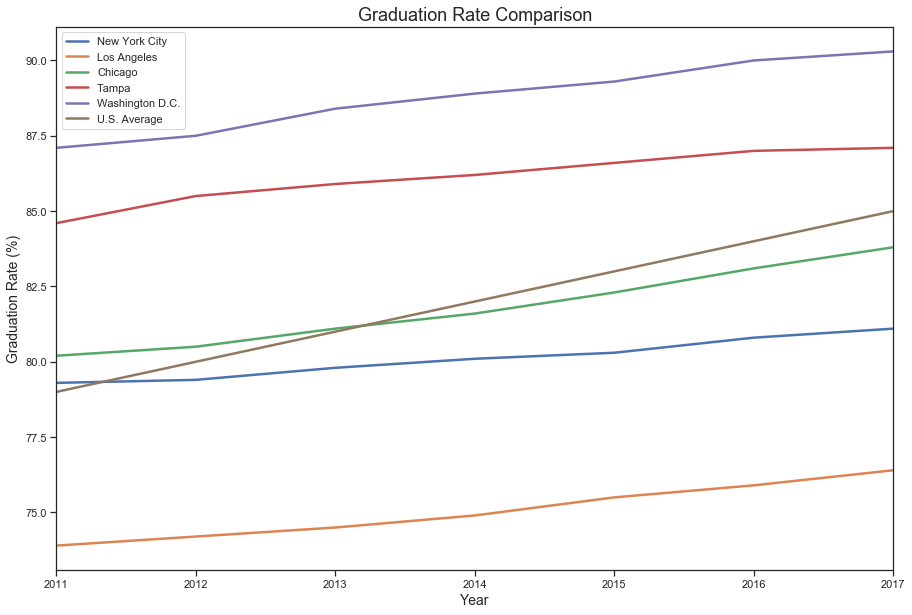

In [10]:
#Line Graph
national_grad.plot(kind='line', x='Year', figsize=(15,10), lw=2.5)
plt.xlabel('Year', size=14)
plt.ylabel('Graduation Rate (%)', size=14)
plt.title('Graduation Rate Comparison', size=18)
plt.savefig('Graphs/Graduation Rate Comparison (Line)')

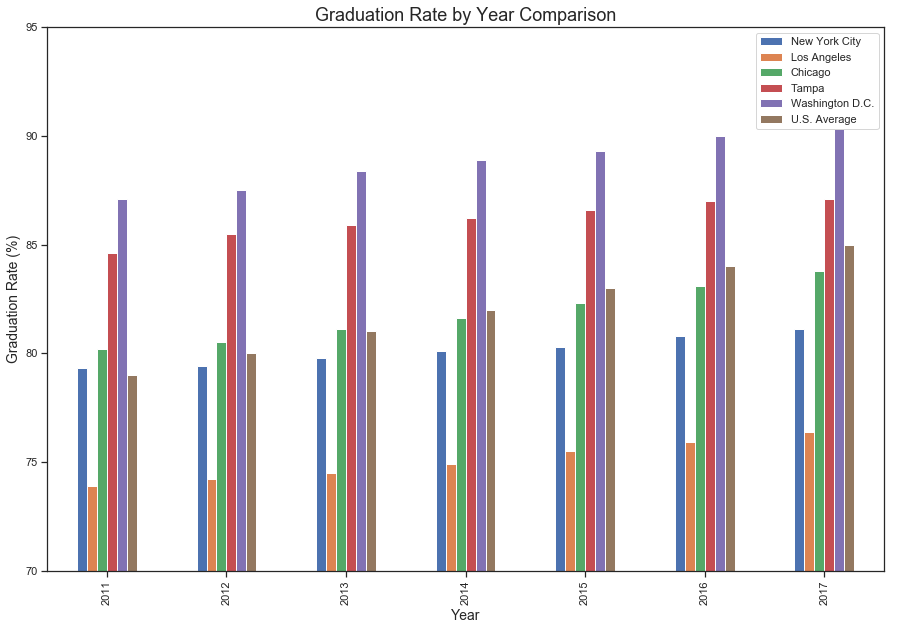

In [11]:
#Bar Graph
national_grad.plot(kind='bar', x='Year', figsize=(15,10))
plt.ylim(70, 95)
plt.xlabel('Year', size=14)
plt.ylabel('Graduation Rate (%)', size=14)
plt.title('Graduation Rate by Year Comparison', size=18)
plt.savefig('Graphs/Graduation Rate Comparison (Bar)')

### Graduation Rate Statistics

In [12]:
#Regression Lines and ANOVA
print("GRADUATION RATE STATISTICS")
print(f"ANOVA: {stats.f_oneway(LA_grad_rate, NYC_grad_rate, Chi_grad_rate, Tamp_grad_rate, DC_grad_rate, US_grad_rate)}\n")
print(f"Los Angeles Line Regression: {linregress(national_grad['Year'], LA_grad_rate)}\n")
print(f"New York City Line Regression: {linregress(national_grad['Year'], NYC_grad_rate)}\n")
print(f"Chicago Line Regression: {linregress(national_grad['Year'], Chi_grad_rate)}\n")
print(f"Tampa Line Regression: {linregress(national_grad['Year'], Tamp_grad_rate)}\n")
print(f"Washington D.C. Line Regression: {linregress(national_grad['Year'], DC_grad_rate)}\n")
print(f"United States Line Regression: {linregress(national_grad['Year'], US_grad_rate)}\n")

GRADUATION RATE STATISTICS
ANOVA: F_onewayResult(statistic=96.2025814440846, pvalue=8.489550849607454e-20)

Los Angeles Line Regression: LinregressResult(slope=0.42500000000000016, intercept=-780.9071428571432, rvalue=0.9941551691155527, pvalue=5.0006045437086406e-06, stderr=0.02064026182400025)

New York City Line Regression: LinregressResult(slope=0.3107142857142848, intercept=-545.6642857142838, rvalue=0.9917146368779285, pvalue=1.1948195589873575e-05, stderr=0.01799943309764843)

Chicago Line Regression: LinregressResult(slope=0.6142857142857133, intercept=-1155.3714285714266, rvalue=0.9927777575601614, pvalue=8.481088843971944e-06, stderr=0.03319700011035014)

Tampa Line Regression: LinregressResult(slope=0.3999999999999996, intercept=-719.4714285714277, rvalue=0.974834873351907, pvalue=0.00019035816087659794, stderr=0.0409080601807903)

Washington D.C. Line Regression: LinregressResult(slope=0.5535714285714285, intercept=-1026.1071428571427, rvalue=0.9937530957887244, pvalue=5.90

## Poverty Rate

In [13]:
#Import CSVs
nyc_pov_file = "../New York/PercentEarningNewYork.csv"
la_pov_file = "../Los Angeles/LA_income.csv"
chi_pov_file = "../Chicago/Chicago_Income_Rates.csv"
tamp_pov_file = "../Tampa/Tampa_poverty.csv"
dc_pov_file = "../DC_Crime/DC_Perc_Poverty.csv"
us_pov_file = "National Data/National_Poverty_Rates.csv"

#Read CSVs
nyc_poverty = pd.read_csv(nyc_pov_file)
la_poverty = pd.read_csv(la_pov_file)
chi_poverty = pd.read_csv(chi_pov_file)
tamp_poverty = pd.read_csv(tamp_pov_file)
dc_poverty = pd.read_csv(dc_pov_file)
us_poverty = pd.read_csv(us_pov_file)

In [14]:
#Data Cleanup
#New York
nyc_poverty['New York City'] = nyc_poverty['<$10,000 %'] + nyc_poverty['$10,000 - $14,999 %'] + nyc_poverty['$15,000 - $24,999 %']
nyc_poverty = nyc_poverty[['Year', 'New York City']]

#Los Angeles
la_poverty['Los Angeles'] = la_poverty['% 15000-24999'] + la_poverty['% 10000-14999'] + la_poverty['% <10000']
la_poverty = la_poverty[['Year', 'Los Angeles']]

#Chicago
chi_poverty['Chicago'] = chi_poverty['< $10,000'] + chi_poverty['$10,000 - $14,999'] + chi_poverty['$15,000 - $24,999']
chi_poverty = chi_poverty.rename(columns={'\ufeffYears': 'Year'})
chi_poverty = chi_poverty[['Year', 'Chicago']]

#Tampa
tamp_poverty = tamp_poverty.rename(columns = {'% <25000': 'Tampa'})
tamp_poverty = tamp_poverty[['Year', 'Tampa']]

#Washington D.C.
dc_poverty = dc_poverty.rename(columns = {'Percent Below Poverty Line': 'Washington D.C.'})
dc_poverty = dc_poverty[['Year', 'Washington D.C.']]

#United States
us_poverty = us_poverty.rename(columns = {'Poverty Rate': 'U.S. Average'})
us_poverty = us_poverty[['Year', 'U.S. Average']]

In [15]:
#Merge Dataframes
national_poverty = pd.merge(nyc_poverty, la_poverty, on='Year', how='outer')
national_poverty = pd.merge(national_poverty, chi_poverty, on='Year', how='outer')
national_poverty = pd.merge(national_poverty, tamp_poverty, on='Year', how='outer')
national_poverty = pd.merge(national_poverty, dc_poverty, on='Year', how='outer')
national_poverty = pd.merge(national_poverty, us_poverty, on='Year', how='left')

#City Lists
LA_pov_rate = national_poverty['Los Angeles']
NYC_pov_rate = national_poverty['New York City']
Chi_pov_rate = national_poverty['Chicago']
Tamp_pov_rate = national_poverty['Tampa']
DC_pov_rate = national_poverty['Washington D.C.']
US_pov_rate = national_poverty['U.S. Average']

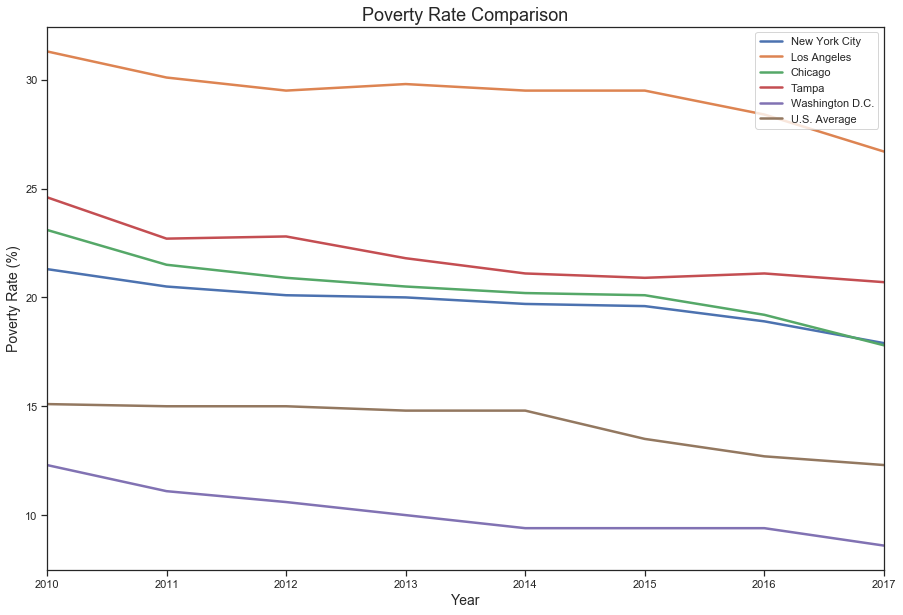

In [16]:
#Line Graph
national_poverty.plot(kind='line', x='Year', figsize=(15,10), lw=2.5)
plt.xlabel('Year', size=14)
plt.ylabel('Poverty Rate (%)', size=14)
plt.title('Poverty Rate Comparison', size=18)
plt.savefig('Graphs/Poverty Rate Comparison (Line)')

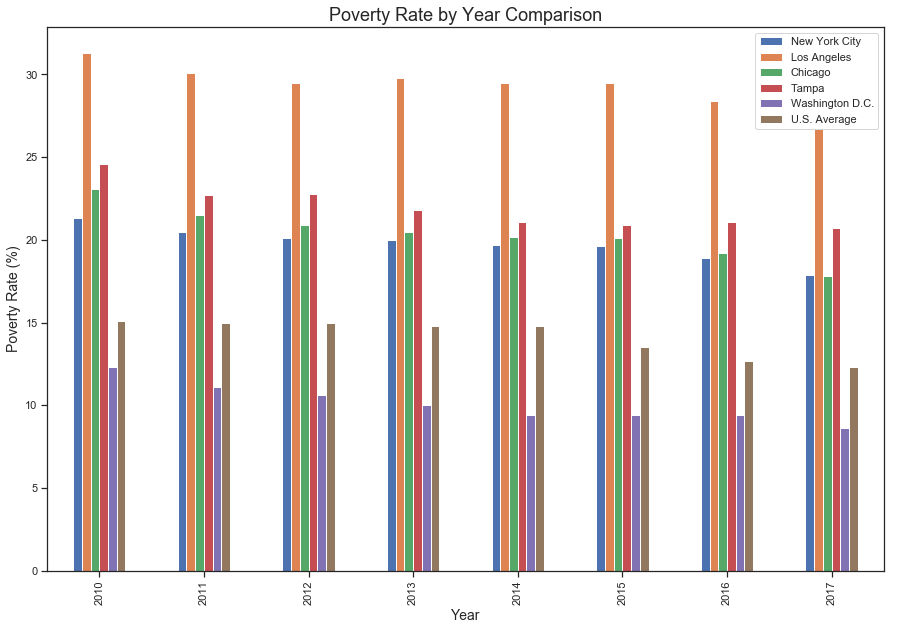

In [17]:
#Bar Graph
national_poverty.plot(kind='bar', x='Year', figsize=(15,10))
plt.xlabel('Year', size=14)
plt.ylabel('Poverty Rate (%)', size=14)
plt.title('Poverty Rate by Year Comparison', size=18)
plt.savefig('Graphs/Poverty Rate Comparison (Bar)')

### Poverty Rate Statistics

In [18]:
#Regression and ANOVA
print("POVERTY RATE STATISTICS")
print(f"ANOVA: {stats.f_oneway(LA_pov_rate, NYC_pov_rate, Chi_pov_rate, Tamp_pov_rate, DC_pov_rate, US_pov_rate)}\n")
print(f"Los Angeles Line Regression: {linregress(national_poverty['Year'], LA_pov_rate)}\n")
print(f"New York City Line Regression: {linregress(national_poverty['Year'], NYC_pov_rate)}\n")
print(f"Chicago Line Regression: {linregress(national_poverty['Year'], Chi_pov_rate)}\n")
print(f"Tampa Line Regression: {linregress(national_poverty['Year'], Tamp_pov_rate)}\n")
print(f"Washington D.C. Line Regression: {linregress(national_poverty['Year'], DC_pov_rate)}\n")
print(f"United States Line Regression: {linregress(national_poverty['Year'], US_pov_rate)}\n")

POVERTY RATE STATISTICS
ANOVA: F_onewayResult(statistic=216.92438658719402, pvalue=7.49168490647361e-29)

Los Angeles Line Regression: LinregressResult(slope=-0.4880952380952387, intercept=1012.1297619047631, rvalue=-0.8925537852868962, pvalue=0.002856553293264615, stderr=0.10067328145737241)

New York City Line Regression: LinregressResult(slope=-0.40000000000000024, intercept=825.1500000000005, rvalue=-0.958140275160817, pvalue=0.00017766167292209515, stderr=0.04879500364742662)

Chicago Line Regression: LinregressResult(slope=-0.6107142857142857, intercept=1250.0857142857142, rvalue=-0.9574312006107505, pvalue=0.00018674304000232874, stderr=0.07516987564231878)

Tampa Line Regression: LinregressResult(slope=-0.49642857142857144, intercept=1021.5214285714286, rvalue=-0.9122062520888419, pvalue=0.0015822924270467629, stderr=0.09103056973264728)

Washington D.C. Line Regression: LinregressResult(slope=-0.45952380952380945, intercept=935.3511904761904, rvalue=-0.9503354281777826, pvalue

## Median Income

In [19]:
#Import CSVs
nyc_inc_file = "../New York/PercentEarningNewYork.csv"
la_inc_file = "../Los Angeles/LA_income.csv"
chi_inc_file = "../Chicago/Chicago_Income_Rates.csv"
tamp_inc_file = "../Tampa/Tampa_income.csv"
dc_inc_file = "../DC_Crime/DC_Med_Income.csv"
us_inc_file = "National Data/National_Poverty_Rates.csv"

#Read CSVs
nyc_income = pd.read_csv(nyc_inc_file)
la_income = pd.read_csv(la_inc_file)
chi_income = pd.read_csv(chi_inc_file)
tamp_income = pd.read_csv(tamp_inc_file)
dc_income = pd.read_csv(dc_inc_file)
us_income = pd.read_csv(us_inc_file)

In [20]:
#Data Cleanup
nyc_income = nyc_income.rename(columns ={'Median Earnings $': 'New York City'})
nyc_income = nyc_income[['Year', 'New York City']]

la_income = la_income.rename(columns={'Median Income': 'Los Angeles'})
la_income = la_income[['Year', 'Los Angeles']]

chi_income = chi_income.rename(columns = {'\ufeffYears': 'Year', 'med': 'Chicago'})
chi_income = chi_income[['Year', 'Chicago']]

tamp_income = tamp_income.rename(columns = {'Median Income': 'Tampa'})
tamp_income = tamp_income[['Year', 'Tampa']]

dc_income = dc_income.rename(columns ={'Median Earnings': 'Washington D.C.'})

us_income = us_income.rename(columns ={'Median Income': 'U.S. Average'})
us_income = us_income[['Year', 'U.S. Average']]

In [21]:
#Merge Dataframes
national_income = pd.merge(nyc_income, la_income, on='Year', how='outer')
national_income = pd.merge(national_income, chi_income, on='Year', how='outer')
national_income = pd.merge(national_income, tamp_income, on='Year', how='outer')
national_income = pd.merge(national_income, dc_income, on='Year', how='outer')
national_income = pd.merge(national_income, us_income, on='Year', how='left')

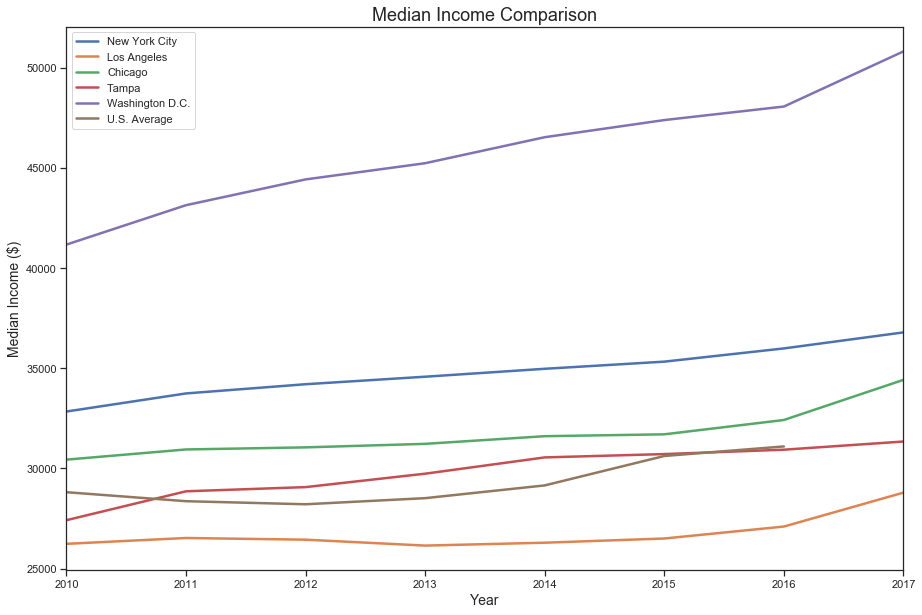

In [22]:
#Line Graph
national_income.plot(kind='line', x='Year', figsize=(15,10), lw=2.5)
plt.xlabel('Year', size=14)
plt.ylabel('Median Income ($)', size=14)
plt.title('Median Income Comparison', size=18)
plt.savefig('Graphs/Median Income Comparison (Line)')

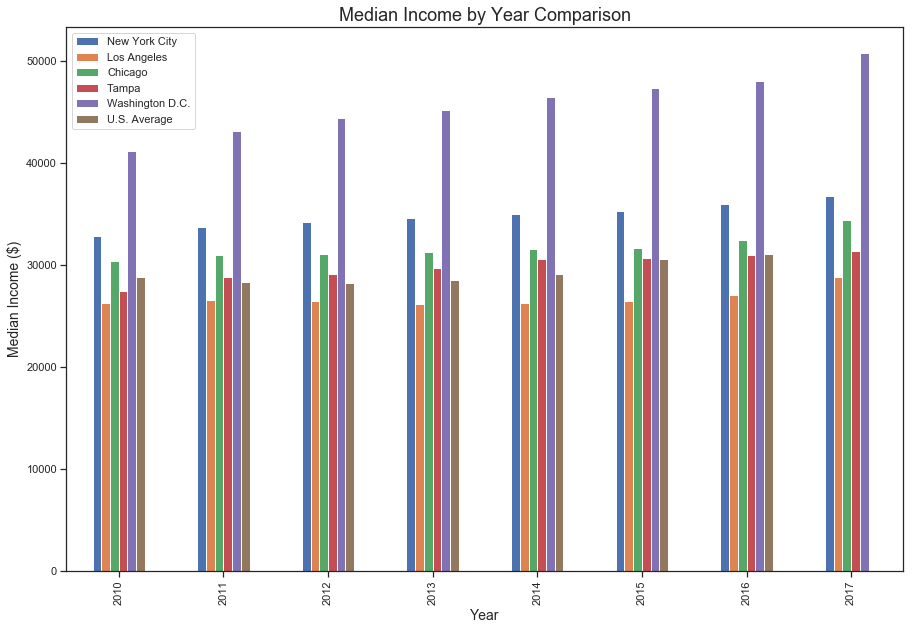

In [23]:
#Bar Graph
national_income.plot(kind='bar', x='Year', figsize=(15,10))
plt.xlabel('Year', size=14)
plt.ylabel('Median Income ($)', size=14)
plt.title('Median Income by Year Comparison', size=18)
plt.savefig('Graphs/Median Income Comparison (Bar)')

### Median Income Statistics

In [24]:
#City Lists
national_income = national_income.drop(index=7)
LA_med_income = national_income['Los Angeles']
NYC_med_income = national_income['New York City']
Chi_med_income = national_income['Chicago']
Tamp_med_income = national_income['Tampa']
DC_med_income = national_income['Washington D.C.']
US_med_income = national_income['U.S. Average']

In [25]:
#Regression and ANOVA
print("MEDIAN INCOME STATISTICS")
print(f"ANOVA: {stats.f_oneway(LA_med_income, NYC_med_income, Chi_med_income, Tamp_med_income, DC_med_income, US_med_income)}\n")
print(f"Los Angeles Line Regression: {linregress(national_income['Year'], LA_med_income)}\n")
print(f"New York City Line Regression: {linregress(national_income['Year'], NYC_med_income)}\n")
print(f"Chicago Line Regression: {linregress(national_income['Year'], Chi_med_income)}\n")
print(f"Tampa Line Regression: {linregress(national_income['Year'], Tamp_med_income)}\n")
print(f"Washington D.C. Line Regression: {linregress(national_income['Year'], DC_med_income)}\n")
print(f"United States Line Regression: {linregress(national_income['Year'], US_med_income)}\n")

MEDIAN INCOME STATISTICS
ANOVA: F_onewayResult(statistic=176.64581442935526, pvalue=2.8190768332255552e-24)

Los Angeles Line Regression: LinregressResult(slope=85.17857142857143, intercept=-144997.75, rvalue=0.587172461654831, pvalue=0.16572740727986682, stderr=52.51411617802572)

New York City Line Regression: LinregressResult(slope=478.25, intercept=-928194.6785714285, rvalue=0.988902795097734, pvalue=2.476857956134968e-05, stderr=32.13142256929397)

Chicago Line Regression: LinregressResult(slope=285.7857142857143, intercept=-543943.9285714285, rvalue=0.9709285080436958, pvalue=0.00027247374960531713, stderr=31.509198527362344)

Tampa Line Regression: LinregressResult(slope=562.3928571428571, intercept=-1102483.8214285714, rvalue=0.9634112501557277, pvalue=0.00048223256949809606, stderr=69.97171257890216)

Washington D.C. Line Regression: LinregressResult(slope=1116.5714285714284, intercept=-2202524.857142857, rvalue=0.9878503294357257, pvalue=3.104791959161742e-05, stderr=78.55692

### ANCOVA

In [26]:
crime_ancova = pd.read_csv('Stats/Crime_Data_ANCOVA.csv')
print("Crime Rate ANCOVA\n")
print(ancova(data=crime_ancova, dv='Crime_Rate', covar=['Median_Income', 'Graduation_Rate', 'Poverty_Rate'], between='City'))

Crime Rate ANCOVA

            Source         SS  DF      F     p-unc
0             City  54524.107   4  7.994  0.000388
1    Median_Income   7103.388   1  4.166  0.053428
2  Graduation_Rate     32.289   1  0.019  0.891804
3     Poverty_Rate   3577.495   1  2.098  0.161599
4         Residual  37514.940  22    NaN       NaN


## Comparisons

In [27]:
#Narrow the rows so each city has the same years
national_data_new = national_data.drop(index=[0,1,2,3,4])

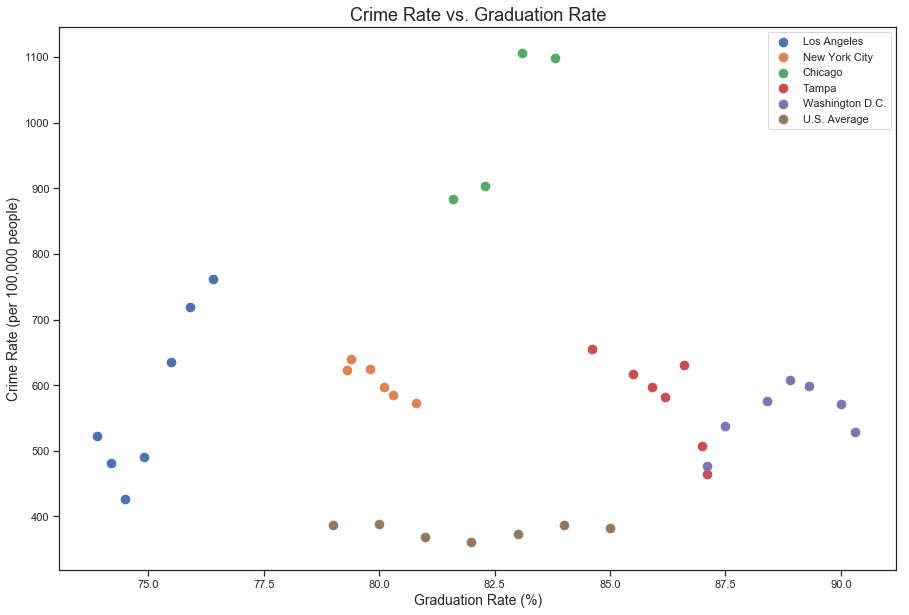

In [28]:
#Scatter Plot - Crime vs. Graduation
plt.figure(figsize=(15,10))
plt.scatter(national_grad['Los Angeles'], national_data_new['Los Angeles'], s=75)
plt.scatter(national_grad['New York City'], national_data_new['New York City'], s=75)
plt.scatter(national_grad['Chicago'], national_data_new['Chicago'], s=75)
plt.scatter(national_grad['Tampa'], national_data_new['Tampa'], s=75)
plt.scatter(national_grad['Washington D.C.'], national_data_new['Washington D.C.'], s=75)
plt.scatter(national_grad['U.S. Average'], national_data_new['U.S. Average'], s=75)
plt.xlabel('Graduation Rate (%)', size=14)
plt.ylabel('Crime Rate (per 100,000 people)', size=14)
plt.title('Crime Rate vs. Graduation Rate', size=18)
plt.legend(loc='best')
plt.savefig('Graphs/Crime Rate vs. Graduation Rate (Scatter).png')

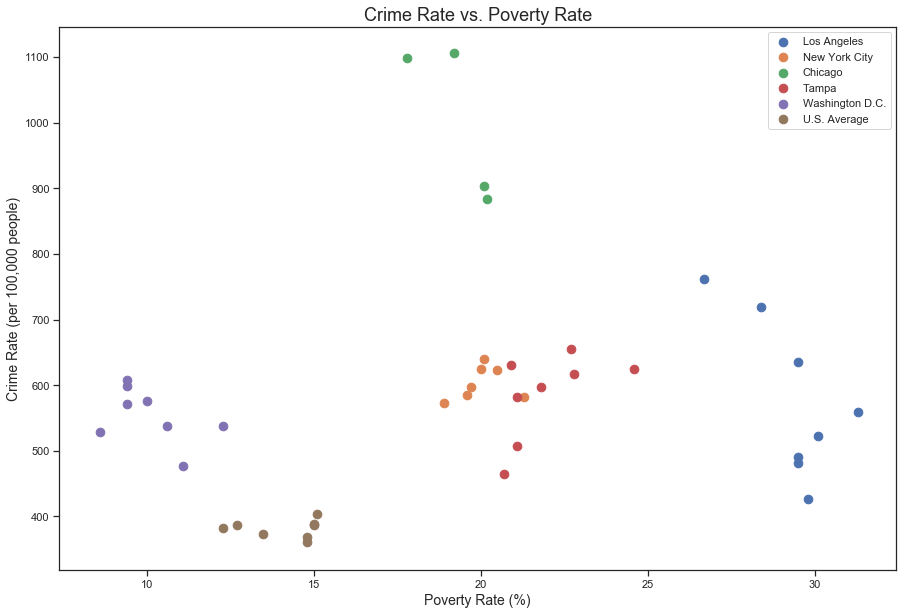

In [29]:
#Scatter Plot - Crime vs. Poverty
national_data_new2 = national_data.drop(index=[0,1,2,3])
plt.figure(figsize=(15,10))
plt.scatter(national_poverty['Los Angeles'], national_data_new2['Los Angeles'], s=75)
plt.scatter(national_poverty['New York City'], national_data_new2['New York City'], s=75)
plt.scatter(national_poverty['Chicago'], national_data_new2['Chicago'], s=75)
plt.scatter(national_poverty['Tampa'], national_data_new2['Tampa'], s=75)
plt.scatter(national_poverty['Washington D.C.'], national_data_new2['Washington D.C.'], s=75)
plt.scatter(national_poverty['U.S. Average'], national_data_new2['U.S. Average'], s=75)
plt.xlabel('Poverty Rate (%)', size=14)
plt.ylabel('Crime Rate (per 100,000 people)', size=14)
plt.title('Crime Rate vs. Poverty Rate', size=18)
plt.legend(loc='best')
plt.savefig('Graphs/Crime Rate vs. Poverty Rate (Scatter).png')

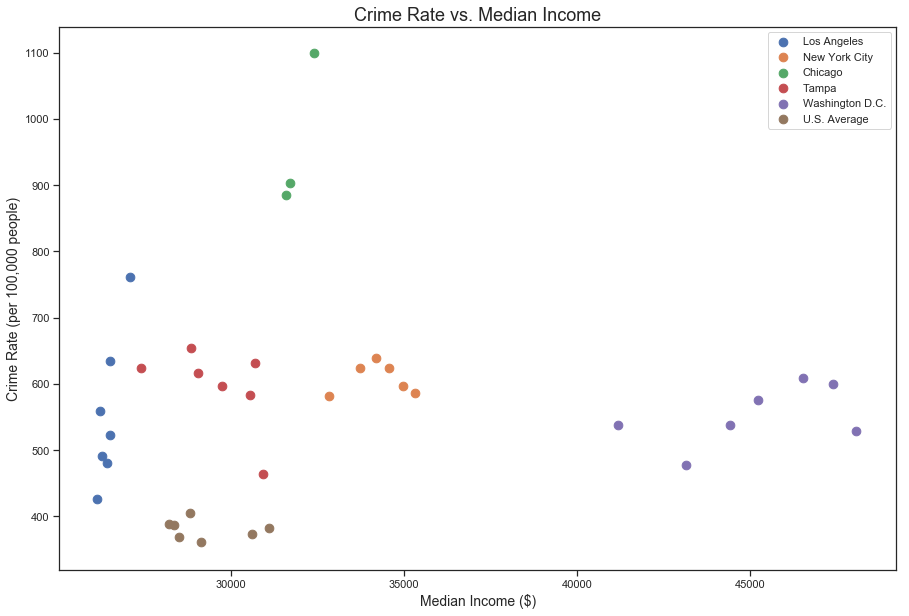

In [30]:
#Scatter Plot - Crime vs. Income
national_data_new3 = national_data_new2.drop(index=11)
plt.figure(figsize=(15,10))
plt.scatter(national_income['Los Angeles'], national_data_new3['Los Angeles'], s=75)
plt.scatter(national_income['New York City'], national_data_new3['New York City'], s=75)
plt.scatter(national_income['Chicago'], national_data_new3['Chicago'], s=75)
plt.scatter(national_income['Tampa'], national_data_new3['Tampa'], s=75)
plt.scatter(national_income['Washington D.C.'], national_data_new3['Washington D.C.'], s=75)
plt.scatter(national_income['U.S. Average'], national_data_new3['U.S. Average'], s=75)
plt.xlabel('Median Income ($)', size=14)
plt.ylabel('Crime Rate (per 100,000 people)', size=14)
plt.title('Crime Rate vs. Median Income', size=18)
plt.legend(loc='best')
plt.savefig('Graphs/Crime Rate vs. Median Income (Scatter).png')

### Graduation Rate vs. Median Income Regression

In [31]:
#create empty lists
inc_reg = []
grad_reg = []

#Pull values from dataframe and place in list.  Use extend so that it's not a list of lists.
inc_reg.extend(national_income['Los Angeles'])
inc_reg.extend(national_income['New York City'])
inc_reg.extend(national_income['Chicago'])
inc_reg.extend(national_income['Tampa'])
inc_reg.extend(national_income['Washington D.C.'])
inc_reg.extend(national_income['U.S. Average'])

grad_reg.extend(national_grad['Los Angeles'])
grad_reg.extend(national_grad['New York City'])
grad_reg.extend(national_grad['Chicago'])
grad_reg.extend(national_grad['Tampa'])
grad_reg.extend(national_grad['Washington D.C.'])
grad_reg.extend(national_grad['U.S. Average'])

#Make an array
inc_reg = np.asarray(inc_reg)
grad_reg = np.asarray(grad_reg)

#Regression line values
reg_slope, reg_intercept, reg_r_value, reg_p_value, reg_std_error = linregress(inc_reg, grad_reg)
fit = reg_slope * inc_reg + reg_intercept
print('GRADUATION RATE VS. MEDIAN INCOME REGRESSION STATISTICS')
linregress(inc_reg, grad_reg)

GRADUATION RATE VS. MEDIAN INCOME REGRESSION STATISTICS


LinregressResult(slope=0.0005172134111795202, intercept=65.38749974602815, rvalue=0.705459780263659, pvalue=1.8177989089215315e-07, stderr=8.216002585410729e-05)

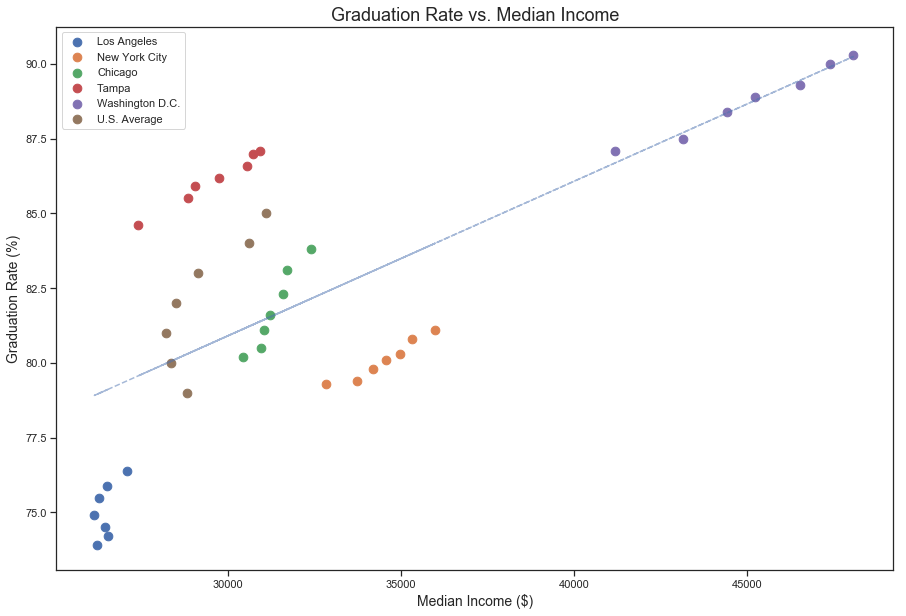

In [32]:
#Scatter Plot - Graduation vs. Income
plt.figure(figsize=(15,10))
plt.scatter(national_income['Los Angeles'], national_grad['Los Angeles'], s=75)
plt.scatter(national_income['New York City'], national_grad['New York City'], s=75)
plt.scatter(national_income['Chicago'], national_grad['Chicago'], s=75)
plt.scatter(national_income['Tampa'], national_grad['Tampa'], s=75)
plt.scatter(national_income['Washington D.C.'], national_grad['Washington D.C.'], s=75)
plt.scatter(national_income['U.S. Average'], national_grad['U.S. Average'], s=75)

#Regression line plot
plt.plot(inc_reg, fit, 'b--', alpha=0.5)


plt.xlabel('Median Income ($)', size=14)
plt.ylabel('Graduation Rate (%)', size=14)
plt.title('Graduation Rate vs. Median Income', size=18)
plt.legend(loc='best')
plt.savefig('Graphs/Graduation Rate vs. Median Income (Scatter).png')